In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn import metrics

In [2]:
iris = load_iris()
iris.data.shape

(150, 4)

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
X = iris.data[:,2:4]
y = iris.target

In [5]:
irisdf = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                    columns= iris['feature_names'] + ['target'])
irisdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [6]:
setosa = irisdf[irisdf['target']==0]
versicolor = irisdf[irisdf['target']==1]
virginica = irisdf[irisdf['target']==2]

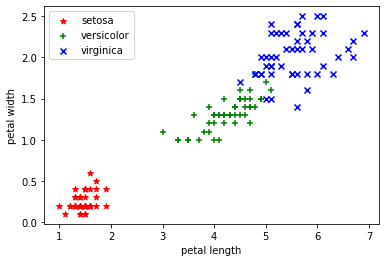

In [7]:
plt.scatter(setosa['petal length (cm)'],setosa['petal width (cm)'],color='red',marker='*',label='setosa')
plt.scatter(versicolor['petal length (cm)'],versicolor['petal width (cm)'],color='green',marker='+',label='versicolor')
plt.scatter(virginica['petal length (cm)'],virginica['petal width (cm)'],color='blue',marker='x',label='virginica')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()
plt.show()

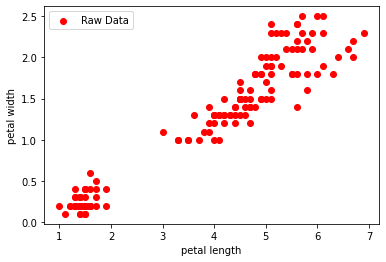

In [8]:
plt.scatter(X[:,0],X[:,1],c='red',marker='o',label='Raw Data')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()
plt.show()

In [9]:
clf_k3 = KMeans(n_clusters=3)
clf_k3.fit(X)

C:\Users\Admin\.conda\envs\Newest Modules\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [10]:
print('labels',clf_k3.labels_)
print('cluster_centers',clf_k3.cluster_centers_)

labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0]
cluster_centers [[5.59583333 2.0375    ]
 [1.462      0.246     ]
 [4.26923077 1.34230769]]


In [11]:
#計算每個類別的資料個數
labels = clf_k3.labels_
cluster_centers = clf_k3.cluster_centers_
label_df = pd.Series(labels).value_counts()
center_df = pd.DataFrame(cluster_centers)
df = pd.concat([center_df,label_df],axis=1)
df.columns = list(['petal length','petal width','label count'])

In [12]:
df

,petal length,petal width,label count
0,5.595833,2.037500,48
1,1.462000,0.246000,50
2,4.269231,1.342308,52


In [13]:
#將labels==0的索引值，當做X的索引，取值後賦值給X0
X0 = X[labels==0]
X1 = X[labels==1]
X2 = X[labels==2]

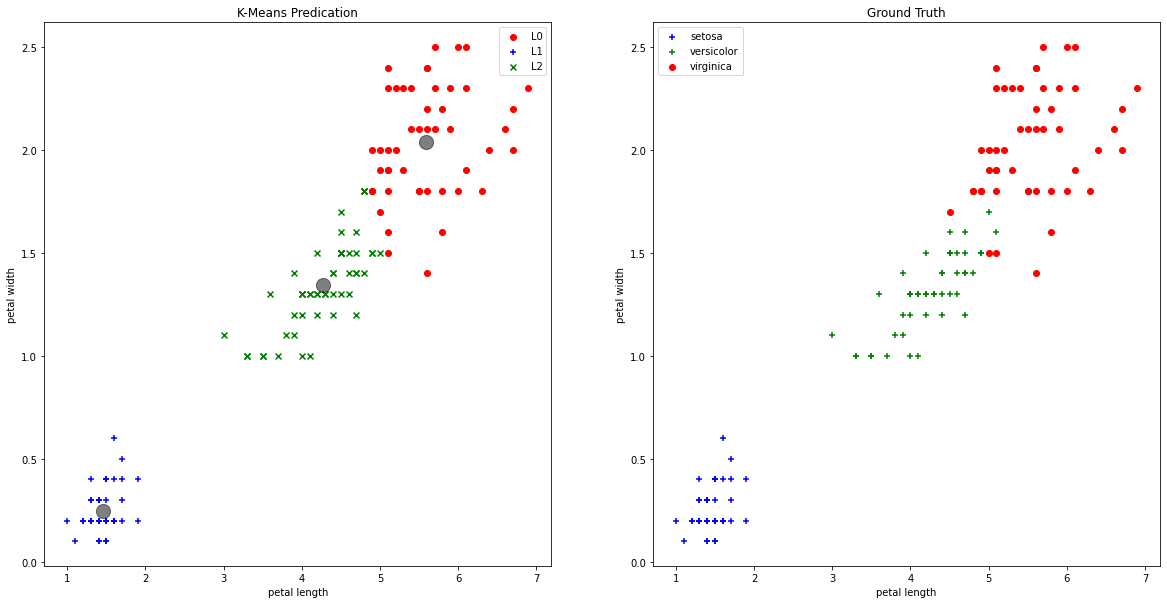

In [14]:
plt.figure(figsize=(20,10))
fig1=plt.subplot(121)
plt.scatter(X0[:,0],X0[:,1],c='red',marker='o',label='L0')
plt.scatter(X1[:,0],X1[:,1],c='blue',marker='+',label='L1')
plt.scatter(X2[:,0],X2[:,1],c='green',marker='x',label='L2')
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],c='black',s=200,alpha=0.5)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('K-Means Predication')
plt.legend()

fig2=plt.subplot(122)
plt.scatter(setosa['petal length (cm)'],setosa['petal width (cm)'],color='blue',marker='+',label='setosa')
plt.scatter(versicolor['petal length (cm)'],versicolor['petal width (cm)'],color='green',marker='+',label='versicolor')
plt.scatter(virginica['petal length (cm)'],virginica['petal width (cm)'],color='red',marker='o',label='virginica')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('Ground Truth')
plt.legend()

plt.show()

In [15]:
y_pred = clf_k3.predict(X)

In [16]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
ss = metrics.silhouette_score(X, labels, metric='euclidean')
print(ss)

0.6604800083974887


In [18]:
ars = metrics.adjusted_rand_score(y,y_pred)
print(ars)

0.8856970310281228


In [19]:
ami = metrics.adjusted_mutual_info_score(y,y_pred)
print(ami)

0.8624853568628784


In [20]:
hs = metrics.homogeneity_score(y,y_pred)
print(hs)

0.8639756867013153


In [21]:
cs = metrics.completeness_score(y,y_pred)
print(cs)

0.8643954288752762


In [22]:
vms = metrics.v_measure_score(y,y_pred)
print(vms)

0.8641855068202221


In [23]:
fms = metrics.fowlkes_mallows_score(y,y_pred)
print(fms)

0.9233071803662838


In [24]:
chs = metrics.calinski_harabasz_score(X,labels)
print(chs)

1217.1934326018418


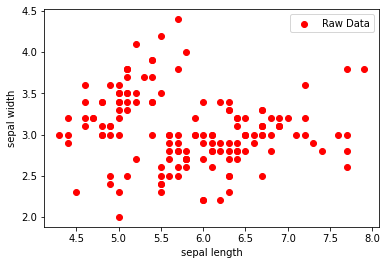

In [25]:
#請使用sepal length/width進行聚類(k=3)
X = iris.data[:,0:2]
y = iris.target
plt.scatter(X[:,0],X[:,1],c='red',marker='o',label='Raw Data')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()